# Visualization of M&A Data From 1990 to 2020
Joseph Obonyo  
Data was collected from the Bloomberg Terminal using the MA function

In [1]:
import pandas as pd
import numpy as np
from datetime import datetime  

In [11]:
data = pd.read_csv('M&A Dataset.csv', index_col=0)

In [12]:
def process_date(df):
    df["Date"] = pd.to_datetime(df["Completion/Termination Date"], format="%Y-%m-%d") # seting the column as pandas datetime
    df["Weekday"] = df["Date"].dt.weekday #extracting week day
    df["Day"] = df["Date"].dt.day # extracting day
    df["Month"] = df["Date"].dt.month # extracting month
    df["Year"] = df["Date"].dt.year # extracting year
    
    return df

In [13]:
data = process_date(data)

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = fig_id + "." + fig_extension
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution, bbox_inches='tight')

## Cash Ratio

C:\anaconda\envs\geo_env\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


Saving figure Cash Ratio


<Figure size 1440x1296 with 0 Axes>

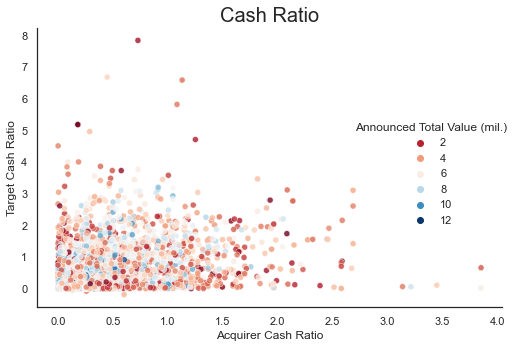

In [64]:
sns.set_theme(style="white")
plt.figure(figsize=(20, 18))

# I used the natural log of both the x and y variable to normalize the data and improve the scaling of the plot
sns.relplot(data=data, x=np.log1p(data['Acquirer Cash Ratio']), y=np.log1p(data['Target Cash Ratio']), palette='RdBu',
            hue=np.log1p(data['Announced Total Value (mil.)']), alpha=0.8)
plt.title('Cash Ratio', size=20)
save_fig('Cash Ratio')

There doesn't seem to be any patterns in respect to the Announced Total Value

## Free Cash Flow

C:\anaconda\envs\geo_env\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: divide by zero encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\anaconda\envs\geo_env\lib\site-packages\pandas\core\arraylike.py:364: RuntimeWarning: invalid value encountered in log1p
  result = getattr(ufunc, method)(*inputs, **kwargs)


<Figure size 1080x936 with 0 Axes>

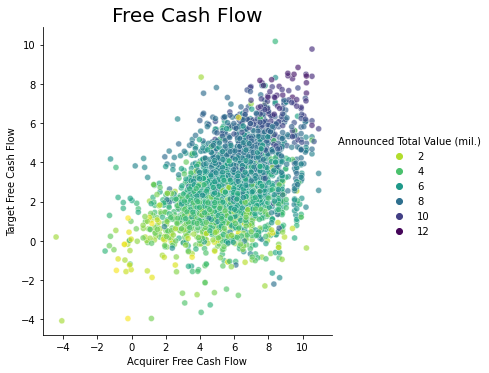

In [15]:
plt.figure(figsize=(15, 16)).set_size_inches(15, 13)

# I used the natural log of both the x and y variable to normalize the data and improve scaling of the plot
sns.relplot(data=data, x=np.log1p(data['Acquirer Free Cash Flow']), y=np.log1p(data['Target Free Cash Flow']), 
            palette='viridis_r', hue=np.log1p(data['Announced Total Value (mil.)']), alpha=0.65)
plt.title('Free Cash Flow', size=20)
plt.savefig('Free Cash Flow.png', format='png', dpi=300, bbox_inches='tight')
plt.show()

The Free Cash Flow of the Acquirer and Target are positively correlated in these deals. They're also strongly positively correlated with the Announced Total Value.

## Number of Shareholders

Saving figure Number of Shareholders


<Figure size 1080x1080 with 0 Axes>

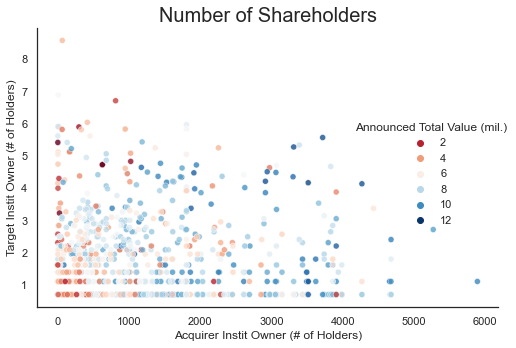

In [9]:
plt.figure(figsize=(15, 15))

# Only the natural log of the y axis was used
sns.relplot(data=data, x=data['Acquirer Instit Owner (# of Holders)'], y=np.log1p(data['Target Instit Owner (# of Holders)']), palette='RdBu',
            hue=np.log1p(data['Announced Total Value (mil.)']), alpha=0.8)
plt.title('Number of Shareholders', size=20)
save_fig('Number of Shareholders')

This plot was scaled to show more of the y axis values, as such the part to pay more attention to is the x axis. Announced Total Value seems to go up when the Acquirer's Number of Shareholders go up.

## Time Series of Announced Total Value Each Year

In [10]:
# Grouping by year and month
group1 = data.groupby(['Year', 'Month'])['Announced Total Value (mil.)']
group1 = pd.DataFrame(group1.sum())

Saving figure Value Time Series


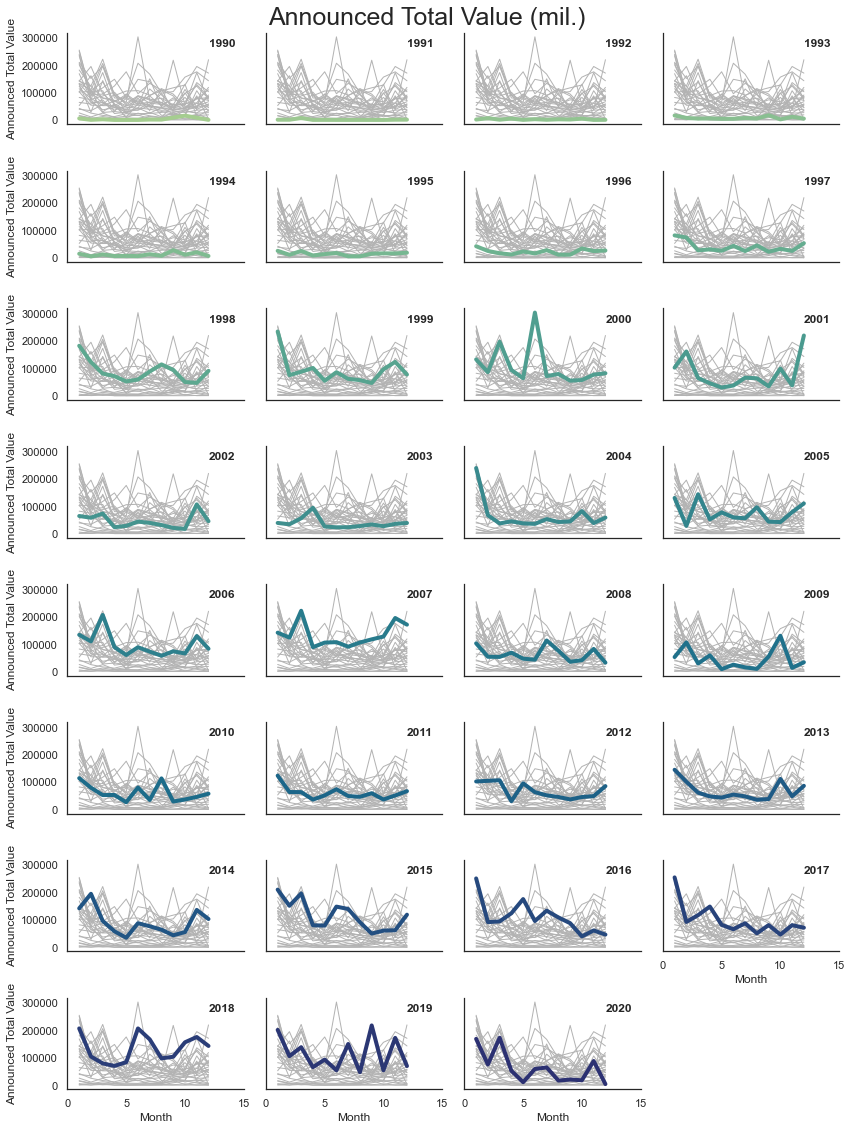

In [11]:
# Plot each year's time series in its own facet
g = sns.relplot(
    data=group1,
    x="Month", y="Announced Total Value (mil.)", col="Year", hue="Year",
    kind="line", palette="crest", linewidth=4, zorder=5,
    col_wrap=4, height=2, aspect=1.5, legend=False,
)

# Iterate over each subplot to customize further
for year, ax in g.axes_dict.items():

    # Add the title as an annotation within the plot
    ax.text(.8, .85, year, transform=ax.transAxes, fontweight="bold")

    # Plot every year's time series in the background
    sns.lineplot(
        data=group1, x="Month", y="Announced Total Value (mil.)", units="Year",
        estimator=None, color=".7", linewidth=1, ax=ax,
    )

# Reduce the frequency of the x axis ticks
ax.set_xticks(ax.get_xticks()[::2])

# Tweak the supporting aspects of the plot
g.set_titles("")
g.fig.suptitle("Announced Total Value (mil.)", fontsize=25)
g.set_axis_labels("Month", "Announced Total Value")
g.tight_layout()
save_fig('Value Time Series')

After 1996, deal sizes went up and variance in deal sizes also increased.

## Payment Types

#### Calculating the angles for the pie chart

In [7]:
pie_dict = dict(data['Payment Type'].value_counts())
pie_dict

{'Cash': 47604,
 'Stock': 7816,
 'Undisclosed': 6494,
 'Cash and Stock': 6145,
 'Cash and Debt': 1873,
 'Cash, Stock & Debt': 840,
 'Cash or Stock': 768,
 'Stock & Debt': 531,
 'Debt': 240}

In [8]:
perc = [value/data['Payment Type'].value_counts().sum() for value in pie_dict.values()]
perc = np.array(perc)
perc = np.around(perc, 3)
perc * 100

array([65.8, 10.8,  9. ,  8.5,  2.6,  1.2,  1.1,  0.7,  0.3])

#### Plotting the pie chart

Saving figure Payment Types


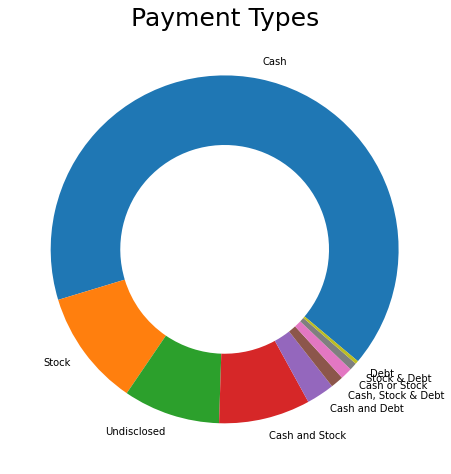

In [9]:
# Initiate figure
fig, ax = plt.subplots(figsize=(15, 8), subplot_kw=dict(aspect="equal"))

# Get the list of labels
payment_type = list(pie_dict.keys())

# Get the list of percentages that will be used as angles
data = perc

# Create pie chart
wedges, texts = ax.pie(data, wedgeprops=dict(width=0.4), startangle=-40, labels=payment_type)

# Arguments for labels and connecting lines
bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
kw = dict(arrowprops=dict(arrowstyle="-"), bbox=bbox_props, zorder=0, va="center")

for i, p in enumerate(wedges):
    ang = (p.theta2 - p.theta1)/2. + p.theta1
    y = np.sin(np.deg2rad(ang))
    x = np.cos(np.deg2rad(ang))
    horizontalalignment = {-1: "right", 1: "left"}[int(np.sign(x))]
    connectionstyle = "angle,angleA=0,angleB={}".format(ang)
    kw["arrowprops"].update({"connectionstyle": connectionstyle})
#     ax.annotate(payment_type[i], xy=(x, y), xytext=(1.3*np.sign(x), 1.4*y),
#                 horizontalalignment=horizontalalignment, **kw)

ax.set_title("Payment Types", fontsize=25)
save_fig('Payment Types', tight_layout=False)
plt.show()

Cash, Stock, and Cash and Stock have been by far the most popular methods of payment. A sizeable portion is Undisclosed.

In [25]:
# Group by Payment Type
group2 = data.groupby('Payment Type')['Payment Type', 'Announced Total Value (mil.)']
group2 = pd.DataFrame(group2.sum())

C:\Users\JOSEPH~1\AppData\Local\Temp/ipykernel_11104/1059619986.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  group2 = data.groupby('Payment Type')['Payment Type', 'Announced Total Value (mil.)']


Saving figure Payment Type Bar


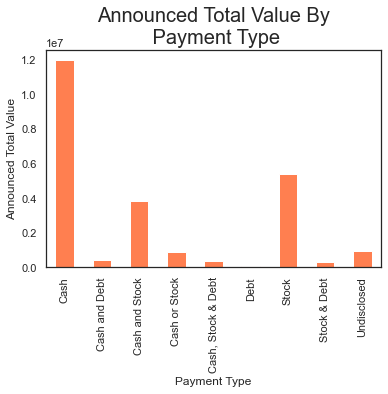

In [67]:
# Plot Bar Chart of Payment Type
group2.plot(kind='bar', color='coral', legend=None)
plt.ylabel('Announced Total Value')
plt.title('Announced Total Value By\n Payment Type', fontsize=20)
save_fig('Payment Type Bar', tight_layout=False)

There is a big gap between the number of deals that are all cash and deals that are all stock, as seen in the pie chart. The bar chart however, shows that the total value of the all Stock and the Cash and Stock deals is a much higher proportion of the value of the Cash deals. The value tends to be higher when payments are made in stock.